# To activate, please follow the instructions below
1. Install python3.11 on your PC (if not already exists)
2. Create venv using the IDE or by terminal: "/path/to/python3.11 -m venv myenv"
3. Activate venv "venv\Scripts\activate
3. Download the following dependencies using pip to venv: "pip install pandas matplotlib scikit-learn tensorflow seaborn"
4. Run the script


In [191]:
# Basic Libraries Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense


# Cleaning and Preparing The Data

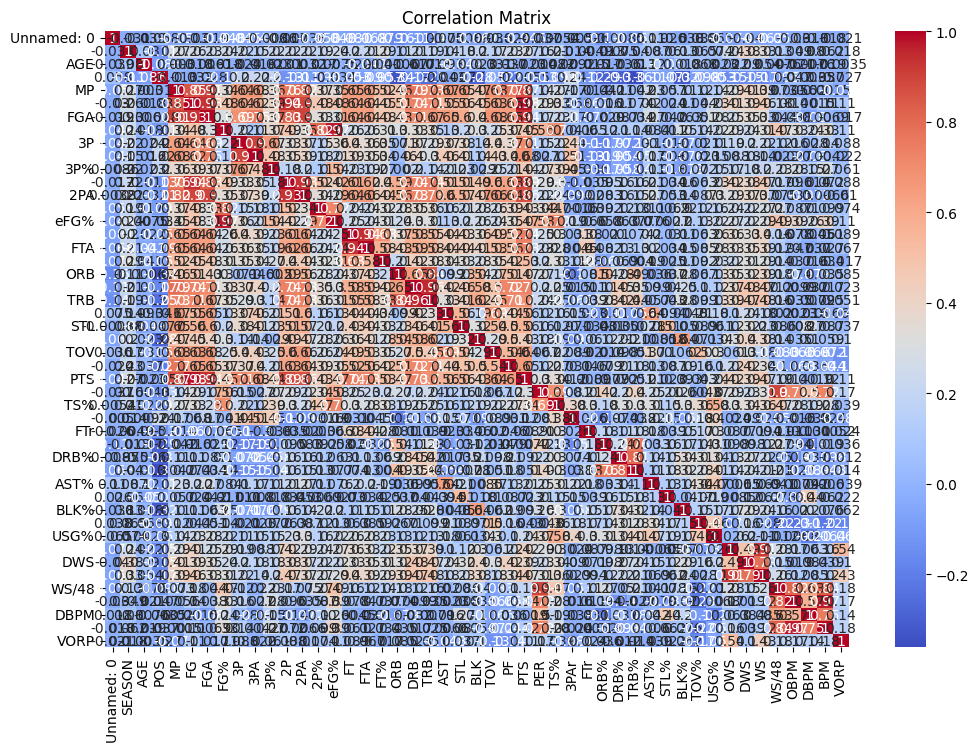

In [192]:
# Load players.csv data into a DataFrame
df = pd.read_csv("players.csv")

# Delate irrelevant columns
df = df.drop(columns=['PLAYER', 'season year'])
# Convert categorical columns to numerical using Label Encoding
df['POS'] = LabelEncoder().fit_transform(df['POS'])
# Fill NaN values with 0
df = df.fillna(0)
# Sample and display 5 rows of the DataFrame
df.sample(5)
df.describe()
df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Dealate All features with correlation to season <= threshold

In [ ]:

# Assuming your DataFrame is called df

# Step 1: Compute correlation matrix
corr_matrix = df.corr()

# Step 2: Get correlation with 'SEASON' only
season_corr = corr_matrix['SEASON']

# Step 3: Select columns with |correlation| >= 0.1 (10%)
threshold = 0.1
strong_corr_cols = season_corr[season_corr.abs() <= threshold].index.tolist()

# Step 4: Create a new DataFrame with only the strong correlation columns
df_strong_corr = df[strong_corr_cols]

# Step 5: (Optional) Check the result
print("Columns with correlation <= 10%:")
new_df = df_strong_corr.columns.tolist()
new_df.append('SEASON')
print(new_df)

print("\nNew DataFrame shape:", df_strong_corr.shape)


Columns with correlation <= 10%:
['Unnamed: 0', 'AGE', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'TOV%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'SEASON']

New DataFrame shape: (659, 15)


In [211]:


# Set the target variable and features matrix
target = df.SEASON
features_matrix = df.drop(columns=new_df)

#target.sample(5)
features_matrix.sample(5)

,POS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,TOV,PF,PTS,PER,TS%,BLK%,OWS,DWS,WS,WS/48
199,0,33.1,4.3,9.7,0.441,0.0,0.0,0.000,4.3,9.7,...,1.6,3.4,11.7,14.7,0.508,1.3,0.3,0.2,0.4,0.091
73,2,11.5,1.3,3.2,0.426,0.3,0.8,0.346,1.1,2.3,...,0.6,0.6,3.7,0.0,0.000,0.0,0.0,0.0,0.0,0.000
0,2,8.8,0.6,2.8,0.214,0.0,1.4,0.000,0.6,1.4,...,0.2,1.0,1.2,0.0,0.000,0.0,0.0,0.0,0.0,0.000
180,4,8.3,1.0,2.5,0.400,0.0,0.3,0.000,1.0,2.2,...,0.2,0.3,2.8,11.6,0.482,0.0,0.1,0.0,0.1,0.064
607,4,10.0,3.0,5.0,0.600,0.0,1.0,0.000,3.0,4.0,...,0.0,0.0,6.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000


Split the Data

In [212]:
# Split the data into training and testing sets 20% training and 80% testing
X_train, X_test, y_train, y_test = train_test_split(features_matrix, target , test_size=0.2, random_state=42)
X_train.sample(5)


,POS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,TOV,PF,PTS,PER,TS%,BLK%,OWS,DWS,WS,WS/48
368,4,5.8,0.8,2.3,0.357,0.5,1.5,0.333,0.3,0.8,...,0.2,0.5,2.2,6.8,0.464,0.0,0.0,0.0,0.0,0.019
50,2,14.8,1.3,4.8,0.263,0.8,2.8,0.294,0.4,1.9,...,1.3,1.7,5.8,9.0,0.495,0.0,-0.1,0.1,0.0,-0.006
53,4,2.3,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,...,0.3,0.8,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
411,4,7.8,0.5,2.5,0.200,0.0,1.0,0.000,0.5,1.5,...,0.0,0.8,2.5,11.2,0.396,0.0,0.0,0.0,0.1,0.087
222,0,3.2,0.2,0.6,0.333,0.0,0.0,0.000,0.2,0.6,...,0.2,0.0,0.4,6.3,0.333,4.7,0.0,0.0,0.0,-0.026


Standardizing the Data 

In [213]:
X_train.sample(5)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  


# Classic ML Model

Building the module and evaluate

In [214]:

# Train a simple Logistic Regression model with AdaBoost
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 78.03%


# Neural Network ML Model

Model Architecture, Compilation, Training and Prediction

In [209]:

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)



Epoch 1/4


c:\Repos\BGU\Python_basics_class\Nitzanim\HW_2025\helper_files\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6130 - loss: 0.6794
Epoch 2/4
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6695 - loss: 0.6134
Epoch 3/4
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7233 - loss: 0.5731
Epoch 4/4
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6857 - loss: 0.6041
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6660 - loss: 0.6199  
